In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Scikit-learn

`Scikit-learn` is the most popular Python package for machine learning.  It has a plethora of machine learning models and provides functions that are often needed for a machine learning workflow. As you will see, it has a nice and intuitive interface. It makes creating complicated machine learning workflows very easy. For this notebook, we will use the California housing data. The data set contains the median house value for each census block group in California.

In [3]:
from sklearn.datasets import fetch_california_housing

# get data
data = fetch_california_housing()
X = data['data']
y = data['target']

print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

## Machine learning models as classes

`Scikit-learn` relies heavily on object-oriented programming principles. It implements machine learning algorithms as classes and users create objects from these "recipes". For example, `Ridge` is a class representing the ridge regression model. To create a `Ridge` object, we simply create an instance of the class. In Python, the convention is that class names use CamelCase, the first letter of each word is capitalized. `Scikit-learn` adopts the convention, making it easy to distinguish what is a class.

In [4]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)

In the above code, we set `alpha=0.1`. Here, `alpha` is a **hyperparameter** of the ridge model. Hyperparameters are model parameters that govern the learning process. In terms of hierarchy, they reside "above" the regular model parameters. They control what values the model parameters are equal to after undergoing training. They can be easily identified as they are the parameters that are set _prior_ to learning. In `scikit-learn`, hyperparameters are set when creating an instance of the class. The default values that `scikit-learn` uses are _usually_ a good set of initial values but this is not always the case. It is important to understand the hyperparameters available and how they affect model performance.

`Scikit-learn` refers to machine learning algorithms as **estimators**. There are three different types of estimators: classifiers, regressors, and transformers. Programmatically, `scikit-learn` has a base class called `BaseEstimator` that all estimators inherit. The models inherit an additional class, either `RegressorMixin`, `ClassifierMixin`, and `TransformerMixin`. The inheritance of the second class determines what type of estimator the model represents. We'll divide the estimators into two groups based up on their interface. These two groups are **predictors** and **transformers**.

## Predictors: classifiers and regressors

As the name suggests, predictors are models that make predictions. There are two main methods.

* `fit(X, y)`: trains/fit the object to the feature matrix $X$ and label vector $y$.
* `predict(X)`: makes predictions on the passed data set $X$.

In [5]:
from sklearn.linear_model import LinearRegression

# create model and train/fit
model = LinearRegression()
model.fit(X, y)

# predict label values on X
y_pred = model.predict(X)


print(y_pred)
print("shape of the  prediction array: {}".format(y_pred.shape))
print("shape of the training set: {}".format(X.shape))

[4.13164983 3.97660644 3.67657094 ... 0.17125141 0.31910524 0.51580363]
shape of the  prediction array: (20640,)
shape of the training set: (20640, 8)


Note, the output of `predict(X)` is a NumPy array of one dimension. The array has the same size as the number of rows of the data that was passed to the `predict` method. 

Since we are using linear regression and our data has eight features, our model is

$$ y(X) = \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \beta_6 x_6 + \beta_7 x_7 + \beta_8 x_8 + \beta_0. $$

The coefficients are stored in the fitted model as an object's attribute. `Scikit-learn` adopts a convention where all attributes that are determined/calculated _after_ fitting end in an underscore. The model coefficients and intercept are retrieved using the `coefs_` and the `intercept_` attributes, respectively.

In [6]:
print("β_0: {}".format(model.intercept_))

for i in range(8):
    print("β_{}: {}".format(i+1, model.coef_[i]))

β_0: -36.94192020718441
β_1: 0.4366932931343245
β_2: 0.009435778033237972
β_3: -0.10732204139090447
β_4: 0.645065693519812
β_5: -3.976389421211576e-06
β_6: -0.003786542654971
β_7: -0.42131437752714385
β_8: -0.43451375467477743


If we wanted to know how well the model performs making predictions with a data set, we can use the `score(X, y)` method. It works by

1. Internally running `predict(X)` to produce predicted values.
1. Using the predicted values to evaluate the model compared to the true label values that were passed to the method.

The evaluation equation varies depending if the model is a regressor or classifier. For regression, it is the $R^2$ value while for classification, it is accuracy.

In [7]:
print("R^2: {:g}".format(model.score(X, y)))

R^2: 0.606233


We used a rather simple model, linear regression. What if we wanted to use a more complicated model? All we need to do is an easy substitution; there is minimum code rewrite as the models have the same interface. Of course, different models have different hyperparameters so we need to be careful when swapping out algorithms. Let's use a more complicated model and train it.

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

# create model and train/fit
model = GradientBoostingRegressor()
model.fit(X, y)

# predict label values on X
y_pred = model.predict(X)

print(y_pred)
print("R^2: {:g}".format(model.score(X, y)))

[4.26432728 3.87864519 3.92074556 ... 0.63664692 0.74759279 0.7994969 ]
R^2: 0.803324


## Transformers

Transformers are models that process and transform a data set. These transformers are very useful because rarely is our data in a form to feed directly to a machine learning model for both training and predicting. For example, a lot of machine learning models work best when the features have similar scales. All transformers have the same interface:

* `fit(X)`: trains/fits the object to the feature matrix $X$.
* `transform(X)`: applies the transformation on $X$ using any parameters learned
* `fit_transform(X)`: applies both `fit(X)` and then `transform(X)`.

Let's demonstrate transformers with `StandardScaler`, which scales each feature to have zero mean and unit variance. The transformed feature $x'_i$ is equal to

$$ x'_i = \frac{x_i - \mu_i}{\sigma_i}. $$

We'll use pandas to summarize the results of deploying the `StandardScaler` on the California housing data.

In [9]:
from sklearn.preprocessing import StandardScaler

# create and fit scaler
scaler = StandardScaler()
scaler.fit(X)

# scale data set
Xt = scaler.transform(X)

# create data frame with results
stats = np.vstack((X.mean(axis=0), X.var(axis=0), Xt.mean(axis=0), Xt.var(axis=0))).T
feature_names = data['feature_names']
columns = ['unscaled mean', 'unscaled variance', 'scaled mean', 'scaled variance']

df = pd.DataFrame(stats, index=feature_names, columns=columns)
df

,unscaled mean,unscaled variance,scaled mean,scaled variance
MedInc,3.870671,3.609148e+00,6.609700e-17,1.0
HouseAge,28.639486,1.583886e+02,5.508083e-18,1.0
AveRooms,5.429000,6.121236e+00,6.609700e-17,1.0
AveBedrms,1.096675,2.245806e-01,-1.060306e-16,1.0
Population,1425.476744,1.282408e+06,-1.101617e-17,1.0
AveOccup,3.070655,1.078648e+02,3.442552e-18,1.0
Latitude,35.631861,4.562072e+00,-1.079584e-15,1.0
Longitude,-119.569704,4.013945e+00,-8.526513e-15,1.0


The data frame shows how our features have wildly different scales; the average population is over 1000 but the average room is slightly over 5. Now, our features each have zero mean and a variance of one.

## Column Transformers

When you are working on a machine learning workflow, your data may require different transformation processes for certain features. What if the "raw" data set may have numerical, categorical, and text data. Each of these types require different processing/transformations. You can handle these sorts of situations using a special type of transformer called a [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html). For example, maybe you want to use the `StandardScalar` on all the California housing features *except* Latitude and Longitude. In this case, you would select the columns that would be scaled while letting the others "pass through" using the `remainder=` argument.

In [10]:
from sklearn.compose import ColumnTransformer

col_transformer = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('scaler', StandardScaler(), slice(0,6)) # first 6 columns
    ]
)

col_transformer.fit(X)
Xt = col_transformer.transform(X)
df

# print('MedInc mean before transformation?', X.mean(axis=0)[0])
# print('MedInc mean after transformation?', Xt.mean(axis=0)[0], '\n')

# print('Longitude mean before transformation?', X.mean(axis=0)[-1])
# print('Longitude mean after transformation?', Xt.mean(axis=0)[-1])

,unscaled mean,unscaled variance,scaled mean,scaled variance
MedInc,3.870671,3.609148e+00,6.609700e-17,1.0
HouseAge,28.639486,1.583886e+02,5.508083e-18,1.0
AveRooms,5.429000,6.121236e+00,6.609700e-17,1.0
AveBedrms,1.096675,2.245806e-01,-1.060306e-16,1.0
Population,1425.476744,1.282408e+06,-1.101617e-17,1.0
AveOccup,3.070655,1.078648e+02,3.442552e-18,1.0
Latitude,35.631861,4.562072e+00,-1.079584e-15,1.0
Longitude,-119.569704,4.013945e+00,-8.526513e-15,1.0


Column transformers also enable you to let some columns pass through while dropping others. For example, if I learned that the information in `'MedInc'` had been corrupted and should be excluded from my model, I could rewrite my column transformer to drop `'MedInc'`, let `'Latitude'` and `'Longitude'` pass through, and scale all remaining features.

In [11]:
col_transformer = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('remove', 'drop', 0),
        ('scaler', StandardScaler(), slice(1,6))
    ]
)

Xt = col_transformer.fit_transform(X)
df

# print('Number of features in X:', X.shape[1])
# print('Number of features Xt:', Xt.shape[1])

,unscaled mean,unscaled variance,scaled mean,scaled variance
MedInc,3.870671,3.609148e+00,6.609700e-17,1.0
HouseAge,28.639486,1.583886e+02,5.508083e-18,1.0
AveRooms,5.429000,6.121236e+00,6.609700e-17,1.0
AveBedrms,1.096675,2.245806e-01,-1.060306e-16,1.0
Population,1425.476744,1.282408e+06,-1.101617e-17,1.0
AveOccup,3.070655,1.078648e+02,3.442552e-18,1.0
Latitude,35.631861,4.562072e+00,-1.079584e-15,1.0
Longitude,-119.569704,4.013945e+00,-8.526513e-15,1.0


## Pipelines

As our analysis and workflow becomes more complicated, we need a tool that helps with scaling up. For example, you may need to apply multiple transformations to your data before it is ready for a supervised machine learning model. You _can_ apply the transformations explicitly, creating intermediate variables of the transformed data. Pipelines are an approach that helps prevent keeping track of intermediate transformations and help scale our code for more complicated analysis. Pipelines are made with the `Pipeline` class. Essentially, a pipeline is an estimator object that holds a series of transformers with a final estimator.

For this example, we want to

1. Scale our data set.
1. Add polynomial features.
1. Train a linear regression model with the transformed data set.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# construct pipeline
scaler = StandardScaler()
poly_features = PolynomialFeatures(degree=2)
lin_reg = LinearRegression()

pipe = Pipeline([
    ('scaler', scaler),
    ('poly', poly_features),
    ('regressor', lin_reg)
])

The pipeline was created by passing a list of tuples representing all the steps in the workflow. Each tuple contains a string that refers to the name of the step and an estimator object. The steps of the pipeline are referred to using the name of the step. The `name_steps` attribute returns a dictionary where the keys are the names for the steps and the values are the estimators for the steps.

In [13]:
pipe.named_steps

{'poly': PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                    order='C'),
 'regressor': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

`Pipeline` objects are estimators; the following lists the behaviors when calling the standard methods.

* `fit(X, y)`: calls `fit_transform(X, y)` sequentially on all transformers and fits the last estimator with the transformed data set.
* `predict(X)`: transforms `X` sequentially with all transformers and predicts using the last estimator with the transformed data set.
* `transform(X)`: transforms `X` sequentially with all transformers, only works if the last estimator is `None`.

For the above constructed pipeline, when calling `pipe.fit(X, y)`, the following process occurs: 
```
Xt = scaler.fit_transform(X) 
Xt = poly.fit_transform(Xt)
lin_reg.fit(Xt)
```
When calling `pipe.predict(X, y)`, the data set `X` will flow through the transformers and be used to make predictions with the predictor in the last stage.
```
Xt = scaler.transform(X)
Xt = poly.transform(Xt)
y_pred = lin_reg.predict(Xt)
```
Because we have encapsulated the entire workflow through a `Pipeline` object, we avoid manually calling the fitting, transformations, and predictions steps. We could even initialize the estimator objects inside of the pipeline to further reduce code volume.

In [14]:
# fit/train model and predict labels
pipe.fit(X, y)
y_pred = pipe.predict(X)

print(y_pred)
print("R^2: {}".format(pipe.score(X, y)))

[4.00298901 3.92349228 3.99012926 ... 0.83369975 0.88801566 0.97559649]
R^2: 0.6832976293317492


## Feature Union

A `FeatureUnion` is another tool for dealing with situations where your data requires different transformation processes for different features. Like `ColumnTransformer`, it processes features separately and combines the results into a single feature matrix. Unlike `ColumnTransformer`, it can handle more complex workflows where you need to use distinct  transformers *and* estimators together before you can pass the complete feature matrix to a final estimator.

While the `Pipeline` objects arrange estimators in a series, `FeatureUnion` objects arrange transformers in parallel. A `FeatureUnion` object combines the output of the each of the transformers in parallel to generate one output matrix. Using a combination of `Pipeline` and `FeatureUnion` objects, we can construct complicated machine learning workflows all within a single `scikit-learn` estimator object.

To illustrate `FeatureUnion`, we will apply the `PCA` and `SelectKBest` transformers. The `PCA`, principal component analysis, transformer returns a new set of uncorrelated features based on the original features while `SelectKBest` returns the k best features based on a passed criterion. For the example, the selector will return the 2 features with the largest correlation with the labels. When using `PCA`, the data needs to have zero mean. As a result, we create a pipeline object that represents the required two step process. We will have the `PCA` object return 4 uncorrelated features. The result of the union between `PCA` and `SelectKBest` will be a data set of 6 features. 

In [15]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion

scaler = StandardScaler()
pca = PCA(n_components=4)
selector = SelectKBest(f_regression, k=2)

pca_pipe = Pipeline([('scaler', scaler), ('dim_red', pca)])
union = FeatureUnion([('pca_pipe', pca_pipe), ('selector', selector)])
pipe = Pipeline([('union', union), ('regressor', lin_reg)])
pipe.fit(X, y)

print("number of columns/features in the original data set: {}".format(X.shape[-1]))
print("number of columns/features in the new data set: {}".format(union.transform(X).shape[-1]))
print("R^2: {}".format(pipe.score(X, y)))

number of columns/features in the original data set: 8
number of columns/features in the new data set: 6
R^2: 0.5288130088767806


## Custom Estimators

While `scikit-learn` provides an abundance of machine learning models and transformers, it sometimes may not provide us a specific model or transformer our workflow requires. However, through the concept of inheritance, we can build a custom estimator that will be compatible with the infrastructure of `scikit-learn`. For example, we want our custom model to have the `fit`, and either `predict` or `transform` methods. Compliance with `scikit-learn` is essential if we want to use our custom model with things like the `Pipeline` and `GridSearchCV` class.

In the example below, we will create a custom transformer that replaces outliers, values outside a given interval. The algorithm for the transformer is as follows. 

1. For each feature, determine the lower and upper bound of acceptable values. These lower and upper bounds are based on the $q$th percentile. For example, if the 5% and 95% percentiles for a feature is 1.3  and 7.5, respectively, then all values outside of (1.3, 7.5) is considered an outlier.

1. For each outlier value of a feature, it is replaced by the $q$th percentiles of the feature. Using the same values as before, if a value for a feature is 0.7 and the acceptable range is (1.3, 7.5), it is replaced by 1.3. If the value resides to the "right" of the interval, larger than the upper bound, then it is replaced by 7.5.

We will build this model stage-wise, adding the requisite methods one by one. 

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, q_lower, q_upper):
        self.q_lower = q_lower
        self.q_upper = q_upper

When creating an object of `OutlierReplacer`, we need to specify the percentiles for the lower and upper bound. The next step is to define the `fit` method. The `fit` method needs to calculate any values required for replacing outlier values.

In [17]:
class OutlierReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, q_lower, q_upper):
        self.q_lower = q_lower
        self.q_upper = q_upper
    
    def fit(self, X, y=None):
        self.upper = np.percentile(X, self.q_upper, axis=0)
        self.lower = np.percentile(X, self.q_lower, axis=0)
        
        return self

Some transformers work with label values but most do not. Since our custom transformer does not make use of label values, we set `y=None` in the method signature. Apart from calculating the lower and upper bounds, the `fit` method returns `self`. In `scikit-learn`, the `fit` method always returns `self`, a copy of the fitted estimator. If you do not return `self`, your custom estimator will not be 100% compatible with `scikit-learn`, for example, if it will not work with the `Pipeline` class. Below, we demonstrate that the `fit` method does return a copy of the transformer.

In [18]:
replacer = OutlierReplacer(5, 95)
replacer_copy = replacer.fit(X) 

print(replacer is replacer_copy)
print(id(replacer) == id(replacer_copy))

True
True


In [19]:
class OutlierReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, q_lower, q_upper):
        self.q_lower = q_lower
        self.q_upper = q_upper
    
    def fit(self, X, y=None):
        self.upper = np.percentile(X, self.q_upper, axis=0)
        self.lower = np.percentile(X, self.q_lower, axis=0)
        
        return self
    
    def transform(self, X):
        Xt = X.copy()
        ind_lower = X < self.lower
        ind_upper = X > self.upper
        
        for i in range(X.shape[-1]):
            Xt[ind_lower[:, i], i] = self.lower[i]
            Xt[ind_upper[:, i], i] = self.upper[i]
        
        return Xt

In the `transform` method, the outlier values are replaced with the appropriate values stored in `self.lower` and `self.upper`, the values "learned" when `fit` was called. Note, we make a copy of the data set since we do not want to modify the passed data set. Python uses "pass-by-object-reference" paradigm; the object is shared by _both_ the function and calling scope. Note, the transformers provided in `scikit-learn` have a keyword argument called `copy` with a default value of `True`. Let's create an object of our custom transformer and test it out.

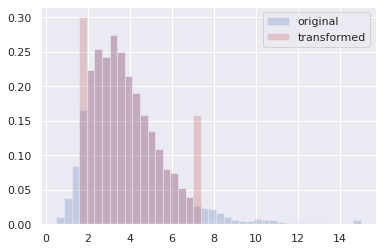

In [20]:
# create and fit a transformer object and transform the data
replacer = OutlierReplacer(5, 95)
replacer.fit(X)
Xt = replacer.transform(X)

# plot histogram of feature 0
_, bins, _ = plt.hist(X[:, 0], density=True, bins=40, alpha=0.25, color='b')
plt.hist(Xt[:, 0], bins=bins, density=True, alpha=0.25, color='r')
plt.legend(['original', 'transformed']);

The histogram of the transformed values show how the extreme values have been truncated.

## Custom Regressors

For the next example, we will construct a custom regressor that always predicts the mean label value of training data set. As before, we will build the estimator stage-wise.

In [21]:
from sklearn.base import RegressorMixin

class MeanRegressor(BaseEstimator, RegressorMixin):
    def __init__(self):
        pass

Since we are creating a regressor, our class inherits `RegressorMixin`, which provides the basic functionality all regressors share. There are no values we need to initialize, so we use the `pass` statement.

In [22]:
class MeanRegressor(BaseEstimator, RegressorMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.y_mean = np.mean(y)
        
        return self

The `fit` method determines the mean label values of the _training_ data and stores the value in `y_mean`. As with the transformer, the `fit` method returns `self`. The last method missing is the `predict` method. In this method, we need to refer to the calculated mean label value and predict this value for all observations.

In [23]:
class MeanRegressor(BaseEstimator, RegressorMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.y_mean = np.mean(y)
        
        return self
    
    def predict(self, X):
        return self.y_mean*np.ones(X.shape[0])

With the our `MeanRegressor` class fleshed out, we can use is it for the California housing data.

In [24]:
mean_regressor = MeanRegressor()
mean_regressor.fit(X, y)

print(mean_regressor.predict(X))
print("R^2: {}".format(mean_regressor.score(X, y)))

[2.06855817 2.06855817 2.06855817 ... 2.06855817 2.06855817 2.06855817]
R^2: 0.0


All our predictions are the same and the $R^2$ value is zero for the training set. The process of creating a custom classifier is the nearly the same as with the regressor. Instead of inheriting the `RegressorMixin`, the class inherits from `ClassifierMixin`.

## Exercises

1. The California housing data has features for latitude and longitude. Create a custom transformer that returns features for the distance away from a given set of coordinates. Use this custom transformer to create features for the distance away from Los Angeles and San Francisco and include them with the original features. How much better does the model perform?

1. Create a custom classifier that always predicts the majority class of the training data. Afterwards, extend the class to have the `predict_proba` method, a method that returns probabilistic values using the distribution of classes in the training data.

In [31]:
#exercise 1
class DistFromCity(BaseEstimator, TransformerMixin):
  def __init__(self, coord):
    self.coord = coord # list or tuple
  
  def fit(self, X, y = None ):
    return self
  
  def transform(self, X):
    lat = X[:, 0]
    lon = X[:, 1]

    dist = (np.sqrt((lat - self.coord[0])**2 + (lon - self.coord[1])**2)).reshape(-1, 1)

    return dist

In [33]:
class DropColumns(BaseEstimator, TransformerMixin):
  def __init__(self, ind_cols):
    self.ind_cols = ind_cols

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X[:, self.ind_cols]

In [34]:
coord_LA = (34, -118)
coord_SF = (37, -122)
dist_LA = DistFromCity(coord_LA)
dist_SF = DistFromCity(coord_SF)
drop = DropColumns([0, 1, 2, 3, 4, 5])
union = FeatureUnion([("drop", drop), ("LA", dist_LA), ("SF", dist_SF)])

pipe = Pipeline([("union", union), ("regressor", LinearRegression())])
pipe.fit(X,y)

Pipeline(memory=None,
         steps=[('union',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('drop',
                                                 DropColumns(ind_cols=[0, 1, 2,
                                                                       3, 4,
                                                                       5])),
                                                ('LA',
                                                 DistFromCity(coord=(34,
                                                                     -118))),
                                                ('SF',
                                                 DistFromCity(coord=(37,
                                                                     -122)))],
                              transformer_weights=None, verbose=False)),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                      

In [35]:
pipe.score(X, y)

0.5492141613373682

In [36]:
pipe.predict(X)

array([4.18553451, 3.99024082, 3.72968357, ..., 0.62812184, 0.77515971,
       1.10086923])

In [37]:
#exercise 2
from sklearn.datasets import load_wine

data = load_wine()
X = data['data']
y = data['target']

In [38]:
from sklearn.base import ClassifierMixin

In [39]:
from collections import Counter

In [43]:
class MajorityClassifier(BaseEstimator, ClassifierMixin):
  def __init__(self):
    pass

  def fit(self, X, y):
    c = Counter(y)
    self.mode_ = c.most_common(1)[0][0]
    self.fraction = np.array(list(c.values())) / X.shape[0]

    return self

  def predict(self, X):
    return self.mode_ * np.ones(X.shape[0])

  def predict_proba(self, X):
    return np.dot(np.ones((X.shape[0], 1)), self.fraction.reshape(1, 3))


In [48]:
mc = MajorityClassifier()
mc.fit(X, y)
mc.predict(X)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [50]:
y_prob = mc.predict_proba(X)

In [51]:
y_prob.sum(axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

*Copyright &copy; 2019 The Data Incubator.  All rights reserved.*